# 라이브러리 임포트

In [3]:
from PIL import Image
from skimage.io import imread, imshow, show

from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale

from scipy import ndimage, misc, signal, stats, fftpack as fp
import matplotlib.pylab as pylab
import numpy as np

# 컨볼루션 이해

# 컬러(RGB) 영상에 컨볼루션 적용

1.0
(340, 527, 3)


C:\Users\sinsm\anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


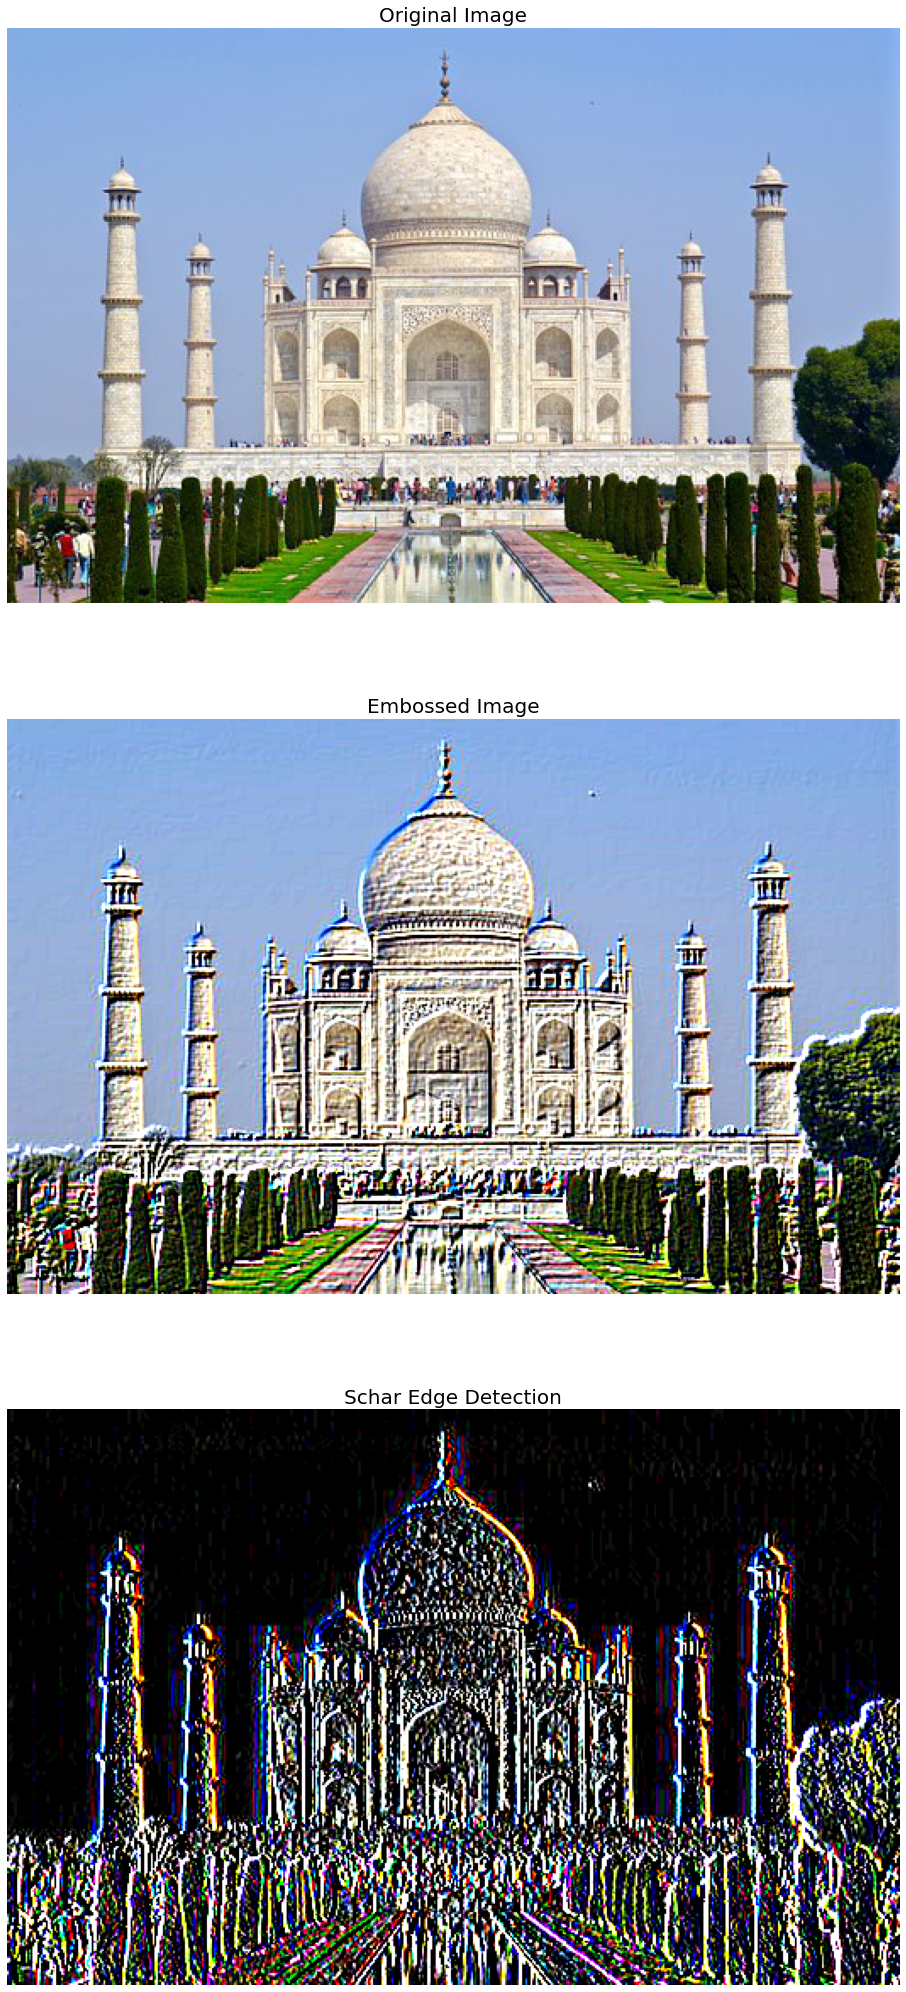

In [9]:
# im = misc.imread('../images/tajmahal.jpg')/255 # 화소값을 0~1 값으로 변환
im = imread('../images/tajmahal.jpg')/255
print(np.max(im)) # 화소값중 최댓값 1.0
print(im.shape) # 행렬의 형태 (1018, 1645, 3)
emboss_kernel = np.array([[-2,-1, 0],
[-1, 1, 1],
[ 0, 1, 2]])
edge_kernel = np.array([[ -3 - 3j, 0 - 10j, +3 -3j], # 복소수
[-10+0j, 0+ 0j, +10+0j],
[ -3+3j, 0+10j, +3 +3j]])
im_embossed = np.ones(im.shape)
im_edges = np.ones(im.shape)
for i in range(3):
    conv = signal.convolve2d(im[...,i], emboss_kernel,
                             mode='same', boundary="symm")
    im_embossed[...,i] = np.clip(conv, 0, 1)
    conv = signal.convolve2d(im[...,i], edge_kernel, mode='same',
                             boundary="symm")
    im_edges[...,i] = np.clip(conv, 0, 1)
    
fig, axes = pylab.subplots(nrows=3, figsize=(20, 36))
axes[0].imshow(im), axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_embossed), axes[1].set_title('Embossed Image', size=20)
axes[2].imshow(im_edges), axes[2].set_title('Schar Edge Detection', size=20)

for ax in axes:
    ax.axis('off')
pylab.show()

# SciPy ndimage.convolve를 이용한 컨볼루션

255.0


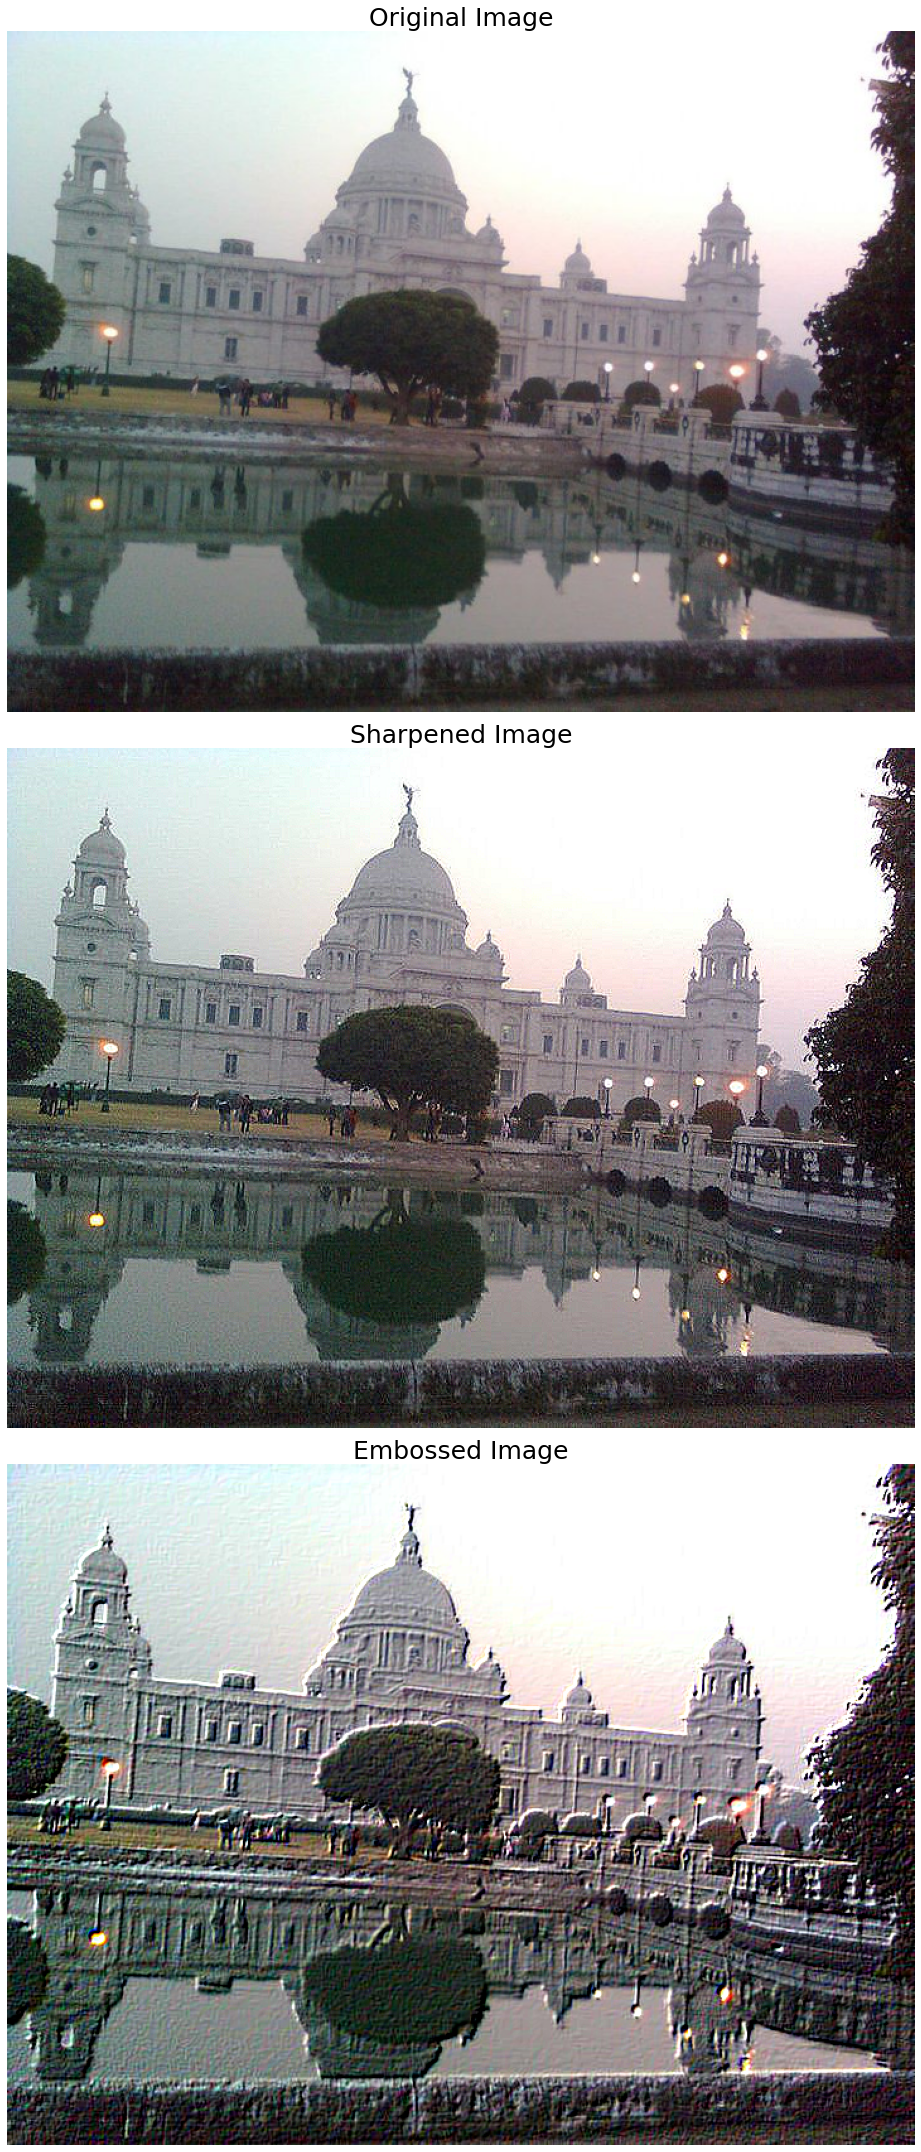

In [12]:
im = imread('../images/vic.png').astype(np.float) # 화소값 실수 변환
print(np.max(im)) 												# 255.0
sharpen_kernel = np.array([ 0, -1, 0,
                           -1, 5, -1,
                           0, -1, 0]).reshape((3, 3, 1))
emboss_kernel = np.array([[-2,-1, 0],
                          [-1, 1, 1],
                          [ 0, 1, 2]]).reshape((3, 3, 1))
im_sharp = ndimage.convolve(im, sharpen_kernel, mode='nearest')
im_sharp = np.clip(im_sharp, 0, 255).astype(np.uint8) 			# 클램핑 및 uint8 변환
im_emboss = ndimage.convolve(im, emboss_kernel, mode='nearest')
im_emboss = np.clip(im_emboss, 0, 255).astype(np.uint8)

pylab.figure(figsize=(20,30))
pylab.subplot(311), pylab.imshow(im.astype(np.uint8)), pylab.axis('off')
pylab.title('Original Image', size=25)
pylab.subplot(312), pylab.imshow(im_sharp), pylab.axis('off')
pylab.title('Sharpened Image', size=25)
pylab.subplot(313), pylab.imshow(im_emboss), pylab.axis('off')
pylab.title('Embossed Image', size=25)
pylab.tight_layout()
pylab.show()